Text(0.5, 1.0, 'Classe 5')

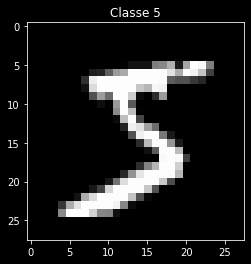

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization

(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[0]))

In [3]:

previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               28, 28, 1)
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

previsores_treinamento /= 255
previsores_teste /= 255

classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)


In [7]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation = 'relu'))

classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2, 2)))
# classificador.add(Flatten())
classificador.add(Conv2D(32, (3, 3)activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size= (2,2)))
classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units= 128, activation= = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento , batch_size = 128 , epochs= 5, validation_data = (previsores_teste, classe_teste))

Epoch 1/5
469/469 [==============================] - 31s 67ms/step - loss: 0.2237 - accuracy: 0.9340 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 2/5
469/469 [==============================] - 34s 73ms/step - loss: 0.0696 - accuracy: 0.9790 - val_loss: 0.0568 - val_accuracy: 0.9822
Epoch 3/5
469/469 [==============================] - 36s 76ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0496 - val_accuracy: 0.9835
Epoch 4/5
469/469 [==============================] - 38s 80ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0458 - val_accuracy: 0.9858
Epoch 5/5
469/469 [==============================] - 31s 66ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0443 - val_accuracy: 0.9860


In [8]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 2s 6ms/step - loss: 0.0443 - accuracy: 0.9860
